# K-means


The k-means is one of the most used, simple and performant clustering algorithms. 

The __*k*__ of k-means stands for the number of cluster we want to look for.

k-means tries to find centers of **similarity** with the following algorithm:

1. initialize k random centroids from the sample points
2. asign each point to the nearest centroid
3. calculate the mean of member points for each cluster
4. move the cluster centroids to the means
5. reasign point membership to the nearest centroid
6. Repeat steps 2, 3, 4 and 5 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.

it is so simple that can be implemented in a few lines of python!:

In [171]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set(context='talk', rc={'figure.figsize':(7,5)})
# K-Means clusterer 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import pairwise_distances_argmin

In [148]:
def make_clusters(n, std):
    """Generates n clusters with 2 features"""
    centers = np.random.rand(n,2)*4
    blobs = make_blobs(50, centers=centers,cluster_std=std)[0]
    plt.scatter(blobs.T[0], blobs.T[1])
    plt.axis('equal')
    return blobs

def find_clusters(X, n_clusters):
    """K-Means with random init of centroids"""
    # 1. make random cluster centers
    i = np.random.permutation(X.shape[0])[:n_clusters]
    
    # chose a known point of the data to be the random initial center
    centers = X[i] 
    
    # init lists to store the iterations
    labels_rec = []
    centers_rec = [centers]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, axis=1)
        labels_rec.append(labels)
        
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        centers_rec.append(new_centers)
    return centers_rec, labels_rec

def plot_kmeans_iter(X, n_clusters):
    """plots the iterations of k-means"""
    # finde the clusters
    centers, labels = find_clusters(X, n_clusters)
    
    # make some colors for the plot
    palette = sns.color_palette(palette='muted',n_colors=n_clusters).as_hex()
    my_cmap = ListedColormap(palette)
    
    #plot!
    fig, axes = plt.subplots(len(centers),1, figsize=(7, len(centers)*5))
    for i, ax in enumerate(axes):
        ax.scatter(X[:,0], X[:,1], c=labels[i], cmap=my_cmap, alpha=0.6)
        ax.scatter(centers[i][:,0], centers[i][:,1], s=100, marker='x', c='k')
        ax.axis('equal')
        if i == 0:
            ax.set_title('Random init of centers', fontsize=14)
        else:
            ax.set_title(f'interation {i}', fontsize=14)
    plt.show()
    
def plot_cluster(X, clusterer):
    y = clusterer.fit_predict(X)
    palette = sns.color_palette(palette='muted',n_colors=clusterer.n_clusters).as_hex()
    my_cmap = ListedColormap(palette)
    centers = clusterer.cluster_centers_
    plt.figure(figsize=(8,6))
    for label in np.unique(y):
        plt.scatter(X[y==label,0], X[y==label,1], alpha=0.7)
    plt.scatter(centers[:,0], centers[:,1], s=100, marker='x', c='k')

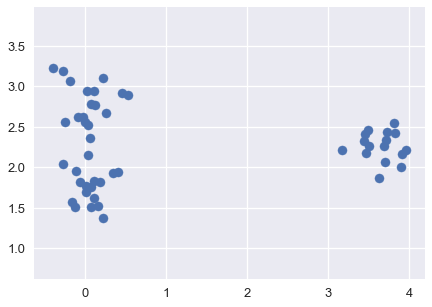

In [157]:
X = make_clusters(3, 0.2)

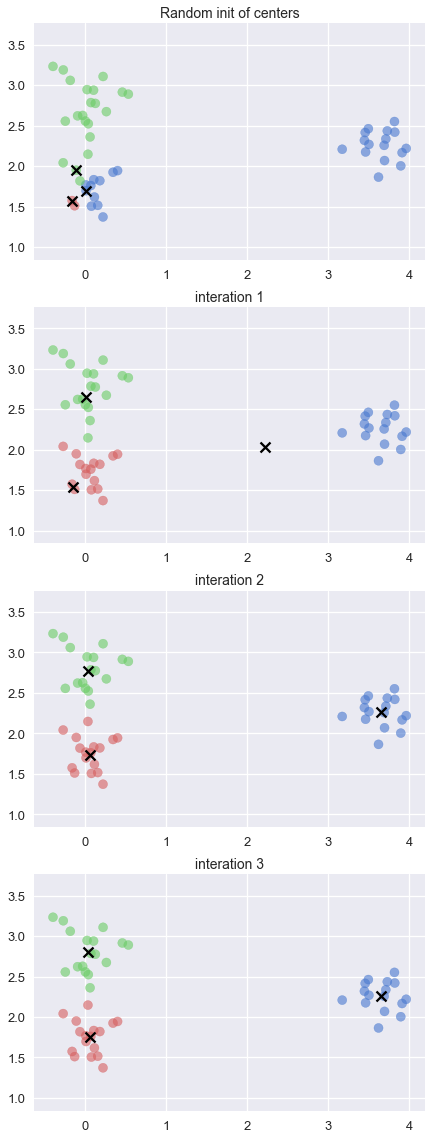

In [161]:
plot_kmeans_iter(X, 3)

one of the drawbacks of this clustering algorithm is that **we have to specify the number of clusters, k**, _a priori_

## Measure Similarity

The similarity can be defined as the opposite of distance.

One of the most commonly used distance measures is the **Euclidean distance**. This distance is just the length of the line that conects the two points.
 
$$ distance(\mathbf{x},\mathbf{y}) = \sqrt{\sum_{i=1} (x_i - y_i)^2} = \| \mathbf{x}-\mathbf{y}\|_2 $$

But sometimes the **squared Euclidean distance** in order to place progressively greater weight on objects that are farther apart.
$$ \| \mathbf{x}-\mathbf{y}\|_2^2 $$

To measure **how good** is the result of the k-means it is used the cluster **inertia**, which is the **sum of squared errors** (SSE) between the the centroid and the members of the cluster.

## Using Scikit-Learn

Now we are going to use the `KMeans` class from the module `cluster` of sklearn

In [167]:
from sklearn.cluster import KMeans

In [168]:
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)  # fit the data and return the cluster labels

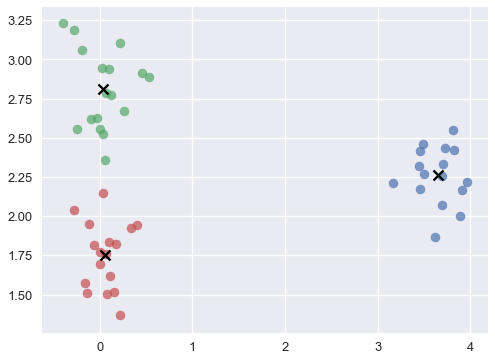

In [169]:
plot_cluster(X, km)

Here we have used the parameter `init="random"` but it is strongly recomended to use `init='kmeans++'`, a more clever way to initialize the centroids that improves the algorithm performance a lot.

## The elbow method to find the optimal number of clusters

One of the main challenges in unsupervised learning is that we do not know the definitive answer. 

Thus, to quantify the quality of clustering, we need to use intrinsic metrics like the **inertia**. It is already accessible via the `inertia_`
attribute after fitting a `KMeans` model

In [165]:
km.inertia_

4.396392783984749

The elbow method is a graphical tool to stimate the optimal number of clusters *k*.

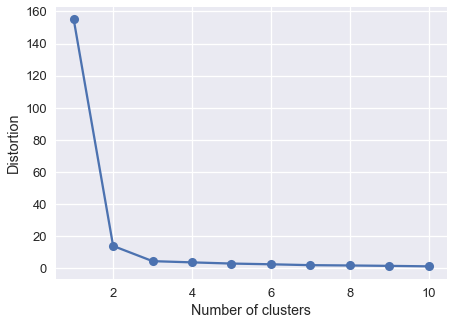

In [170]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

another problem of the k-means is that it haves troubles with convex structures and it makes the assumption that the **clusters are spherical**

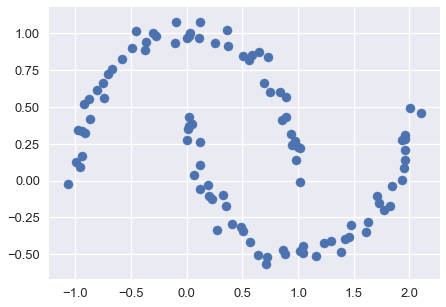

In [180]:
moons = make_moons(noise=0.05)[0]
plt.scatter(moons[:,0], moons[:,1])

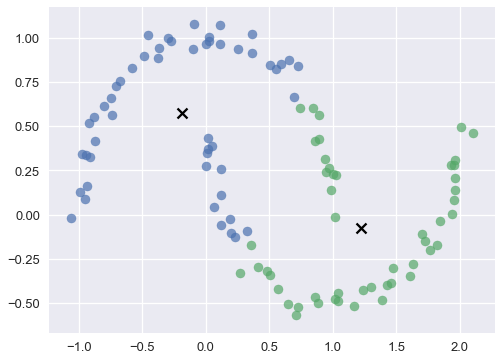

In [181]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
plot_cluster(moons, km)